#df_1, Fake accounts prediction 

##imoorting libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection,linear_model,metrics,svm
from mlxtend.plotting import plot_confusion_matrix
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

##load CSV dataset

In [29]:
df_1 = pd.read_csv("/content/all_users_proccessed.csv")
df_1

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,geo_enabled,profile_use_background_image,profile_text_color,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_color,profile_link_color,utc_offset,description,label
0,20370,5470,2385,145,52,it,Rome,0,1,0C3E53,F2E195,0,FFF7CC,BADFCD,FF0000,3600,Founder of http://www.screenweek.it & http://w...,1
1,3131,506,381,9,40,en,Rome,0,1,333333,FFFFFF,0,DDEEF6,C0DEED,0084B4,3600,BSc degree (cum laude) in Computer Engineering...,1
2,4024,264,87,323,16,en,Rome,0,1,666666,181A1E,1,0,1A1B1F,2FC2EF,3600,Cogito ergo bestemmio.,1
3,40586,640,622,1118,32,en,Rome,1,1,3C3940,FFFFFF,0,95E8EC,0099B9,0099B9,3600,"Se la vita ti dأ sarde, scapocciale!",1
4,2016,62,64,13,0,it,Rome,1,1,333333,EEEEEE,0,F6F6F6,ACDED6,38543,3600,Je me souviens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,1,0,17,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,I have been in business onlin and offline for ...,0
4151,0,1,17,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank,0
4152,2,0,15,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank,0
4153,2,0,16,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank,0


In [30]:
df_1.shape

(4155, 18)

In [31]:
df_1.isnull().sum()

statuses_count                  0
followers_count                 0
friends_count                   0
favourites_count                0
listed_count                    0
lang                            0
time_zone                       0
geo_enabled                     0
profile_use_background_image    0
profile_text_color              0
profile_sidebar_border_color    0
profile_background_tile         0
profile_sidebar_fill_color      0
profile_background_color        0
profile_link_color              0
utc_offset                      0
description                     0
label                           0
dtype: int64

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   statuses_count                4155 non-null   int64 
 1   followers_count               4155 non-null   int64 
 2   friends_count                 4155 non-null   int64 
 3   favourites_count              4155 non-null   int64 
 4   listed_count                  4155 non-null   int64 
 5   lang                          4155 non-null   object
 6   time_zone                     4155 non-null   object
 7   geo_enabled                   4155 non-null   int64 
 8   profile_use_background_image  4155 non-null   object
 9   profile_text_color            4155 non-null   object
 10  profile_sidebar_border_color  4155 non-null   object
 11  profile_background_tile       4155 non-null   object
 12  profile_sidebar_fill_color    4155 non-null   object
 13  profile_background

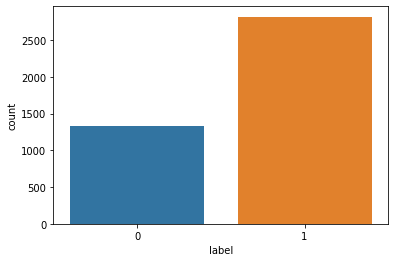

In [33]:
sns.countplot(x='label', data=df_1)

##save manual test dataset

In [34]:
df_testing = df_1.copy()

In [35]:
df_testing.drop(columns='label',axis=0,inplace=True)

In [36]:
df_testing

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,geo_enabled,profile_use_background_image,profile_text_color,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_color,profile_link_color,utc_offset,description
0,20370,5470,2385,145,52,it,Rome,0,1,0C3E53,F2E195,0,FFF7CC,BADFCD,FF0000,3600,Founder of http://www.screenweek.it & http://w...
1,3131,506,381,9,40,en,Rome,0,1,333333,FFFFFF,0,DDEEF6,C0DEED,0084B4,3600,BSc degree (cum laude) in Computer Engineering...
2,4024,264,87,323,16,en,Rome,0,1,666666,181A1E,1,0,1A1B1F,2FC2EF,3600,Cogito ergo bestemmio.
3,40586,640,622,1118,32,en,Rome,1,1,3C3940,FFFFFF,0,95E8EC,0099B9,0099B9,3600,"Se la vita ti dأ sarde, scapocciale!"
4,2016,62,64,13,0,it,Rome,1,1,333333,EEEEEE,0,F6F6F6,ACDED6,38543,3600,Je me souviens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,1,0,17,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,I have been in business onlin and offline for ...
4151,0,1,17,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank
4152,2,0,15,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank
4153,2,0,16,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank


In [37]:
df_fake = df_testing.tail(1)
for i in range(4154,4153,-1):
  df_testing.drop([i],axis=0,inplace=True) 

In [38]:
df_fake.to_csv("fake_testing.csv")

In [39]:
df_true = df_testing.head(1)
for i in range(1,0,-1):
  df_testing.drop([i],axis=0,inplace=True)

In [40]:
df_true.to_csv("true_testing.csv")

##WordNetLemmatizer

In [41]:
df_1['description'].head(10)

0    Founder of http://www.screenweek.it & http://w...
1    BSc degree (cum laude) in Computer Engineering...
2                               Cogito ergo bestemmio.
3                Se la vita ti dأ  sarde, scapocciale!
4                                       Je me souviens
5                Swiper non rubare, Swiper non rubare!
6    I never saw a wild thing sorry for itself.A sm...
7    La vita أ¨ quello che accade mentre sei impegn...
8    Founder e CEO di http://hagakure.it e autore d...
9    Sono timido come Sushi, pigro come Dado e russ...
Name: description, dtype: object

In [42]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
df_1['lang'].value_counts()

en    2838
it    1296
es      12
fr       3
de       2
nl       1
0        1
tr       1
gl       1
Name: lang, dtype: int64

In [44]:
stop_words1 = set(stopwords.words(['italian','english','spanish','french','german','dutch','turkish']))
print(stop_words1)

{'heb', 'meiner', 'tuo', 'faceva', 'dieselbe', 'unsere', 'door', "mustn't", 'am', 'sie', 'sí', "you've", 'by', 'cuando', 'avesse', 'y', 'estarán', 'ayants', 'dein', 'mais', 'che', 'aura', 'ebbero', 'diesem', 'fossi', 'yo', 'es', 'allen', 'welche', 'avevate', 'these', 'wollen', "aren't", "shan't", 'somos', 'meinem', 'above', 'estada', 'mightn', 'tienen', 'des', 'te', 'habré', 'nous', 'sarei', 'fai', 'deinem', 'ja', 't', 'furono', 'muss', 'hubiese', 'until', 'stiano', 'tendríais', 'dich', 'gli', 'which', 'él', 'vuestro', 'tuvisteis', 'tuviera', 'per', 'avais', 'seiner', 'daar', 'stavo', 'habrían', 'habiendo', 'sul', 'into', 'tra', 'eravamo', "should've", 'míos', 'anderen', 'deze', 'kim', 'şey', 'll', 'dei', 'starà', 'damit', 'this', 'jeden', 'éramos', 'himself', 'steste', 'avrebbe', 'einmal', 'then', 'serais', 'avevano', 'hers', 'estuvieron', 'been', 'd', 'nuestras', 'tendríamos', 'derer', 'dies', "hadn't", 'she', 'ile', 'auf', 'durch', 'ander', 'einiges', 'nuestro', 'estas', 'ihren', 'k

In [45]:
wordnet = WordNetLemmatizer()

def prepare_description(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words1])
  x = x.encode('utf-8').decode()
  x = re.sub(r'https*\S+',' ',x)
  x = re.sub(r'@\S+',' ',x)
  x = re.sub(r'#\S+',' ',x)
  x = re.sub(r'\'\w+',' ',x)
  x = re.sub('[%s]' % re.escape(string.punctuation),' ',x)
  x = re.sub(r'\w*\d+\w*',' ',x)
  x = re.sub(r'\s{2,}',' ',x)
  return x

In [46]:
df_1['description'] = df_1['description'].apply(prepare_description)
df_1

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,geo_enabled,profile_use_background_image,profile_text_color,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_color,profile_link_color,utc_offset,description,label
0,20370,5470,2385,145,52,it,Rome,0,1,0C3E53,F2E195,0,FFF7CC,BADFCD,FF0000,3600,founder apple movie lover find rebelmouse,1
1,3131,506,381,9,40,en,Rome,0,1,333333,FFFFFF,0,DDEEF6,C0DEED,0084B4,3600,bsc degree cum laude computer engineering co f...,1
2,4024,264,87,323,16,en,Rome,0,1,666666,181A1E,1,0,1A1B1F,2FC2EF,3600,cogito ergo bestemmio,1
3,40586,640,622,1118,32,en,Rome,1,1,3C3940,FFFFFF,0,95E8EC,0099B9,0099B9,3600,vita dأ sarde scapocciale,1
4,2016,62,64,13,0,it,Rome,1,1,333333,EEEEEE,0,F6F6F6,ACDED6,38543,3600,souviens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,1,0,17,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,business onlin offline years i enjoy traveling...,0
4151,0,1,17,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank,0
4152,2,0,15,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank,0
4153,2,0,16,0,0,en,Chennai,1,1,333333,C0DEED,1,DDEEF6,C0DEED,0084B4,19800,blank,0


In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   statuses_count                4155 non-null   int64 
 1   followers_count               4155 non-null   int64 
 2   friends_count                 4155 non-null   int64 
 3   favourites_count              4155 non-null   int64 
 4   listed_count                  4155 non-null   int64 
 5   lang                          4155 non-null   object
 6   time_zone                     4155 non-null   object
 7   geo_enabled                   4155 non-null   int64 
 8   profile_use_background_image  4155 non-null   object
 9   profile_text_color            4155 non-null   object
 10  profile_sidebar_border_color  4155 non-null   object
 11  profile_background_tile       4155 non-null   object
 12  profile_sidebar_fill_color    4155 non-null   object
 13  profile_background

##merging the data

In [48]:
df_1['content'] = str(df_1['statuses_count'])+' '+str(df_1['followers_count'])+' '+str(df_1['friends_count'])+' '+str(df_1['favourites_count'])+' '+str(df_1['listed_count'])+' '+df_1['lang']+' '+df_1['time_zone']+' '+str(df_1['geo_enabled'])+' '+df_1['profile_use_background_image']+' '+df_1['profile_text_color']+' '+df_1['profile_sidebar_border_color']+' '+df_1['profile_background_tile']+' '+df_1['profile_sidebar_fill_color']+' '+df_1['profile_background_color']+' '+df_1['profile_link_color']+' '+df_1['utc_offset']+' '+df_1['description']
df_1['content']

0       0       20370\n1        3131\n2        4024\n3...
1       0       20370\n1        3131\n2        4024\n3...
2       0       20370\n1        3131\n2        4024\n3...
3       0       20370\n1        3131\n2        4024\n3...
4       0       20370\n1        3131\n2        4024\n3...
                              ...                        
4150    0       20370\n1        3131\n2        4024\n3...
4151    0       20370\n1        3131\n2        4024\n3...
4152    0       20370\n1        3131\n2        4024\n3...
4153    0       20370\n1        3131\n2        4024\n3...
4154    0       20370\n1        3131\n2        4024\n3...
Name: content, Length: 4155, dtype: object

##vector

In [49]:
vector = TfidfVectorizer(stop_words=stop_words1,lowercase=False)
vector

TfidfVectorizer(lowercase=False,
                stop_words={'a', 'aan', 'abbia', 'abbiamo', 'abbiano',
                            'abbiate', 'aber', 'about', 'above', 'acaba', 'ad',
                            'after', 'again', 'against', 'agl', 'agli', 'ai',
                            'aie', 'aient', 'aies', 'ain', 'ait', 'al', 'algo',
                            'algunas', 'algunos', 'all', 'alla', 'alle',
                            'allem', ...})

In [50]:
df_tf = vector.fit_transform(df_1['content'])
df_tf

<4155x10761 sparse matrix of type '<class 'numpy.float64'>'
	with 221578 stored elements in Compressed Sparse Row format>

##x,y

In [51]:
x1 = df_tf
x1

<4155x10761 sparse matrix of type '<class 'numpy.float64'>'
	with 221578 stored elements in Compressed Sparse Row format>

In [52]:
y1 = df_1['label'].values
y1

array([1, 1, 1, ..., 0, 0, 0])

##Test algorithms accuracy's score(before fitting)

In [53]:
models = []
models.append(("LR",linear_model.LogisticRegression()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("Grand",GradientBoostingClassifier()))
models.append(("SVM",svm.SVC()))
models.append(("Forest",RandomForestClassifier()))

results = []
names = []
scoring = 'accuracy'

for name,model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model,x1,y1,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.991809 (0.009469)
XGB: 0.997351 (0.005945)
Grand: 0.996870 (0.006818)
SVM: 0.994461 (0.006099)
Forest: 0.992052 (0.008419)


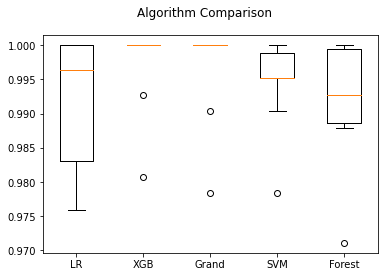

In [54]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##split dataset into train and test

In [55]:
x1_train,x1_test,y1_train,y1_test = model_selection.train_test_split(
    x1,y1,
    test_size=0.3,
    random_state=42,
    shuffle=True,
    stratify=y1
)

x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((2908, 10761), (1247, 10761), (2908,), (1247,))

##Logistic regression 

In [60]:
logistic_model_1 = linear_model.LogisticRegression()
logistic_model_1.fit(x1_train,y1_train)

LogisticRegression()

In [61]:
log_pred1_train = logistic_model_1.predict(x1_train)
log_pred1_test = logistic_model_1.predict(x1_test)

In [62]:
print(f'Training Score: \n{metrics.classification_report(y1_train,log_pred1_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       936
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      2908
   macro avg       1.00      1.00      1.00      2908
weighted avg       1.00      1.00      1.00      2908



In [63]:
print(f'Testing Score: \n{metrics.classification_report(y1_test,log_pred1_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       401
           1       0.99      1.00      1.00       846

    accuracy                           0.99      1247
   macro avg       0.99      0.99      0.99      1247
weighted avg       0.99      0.99      0.99      1247



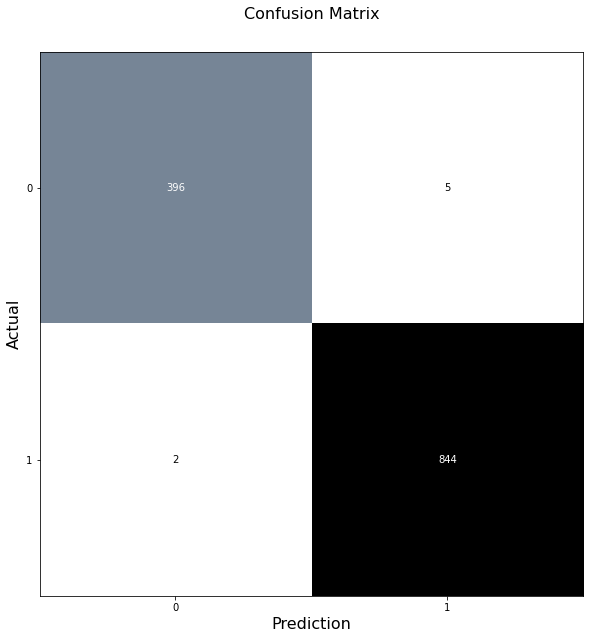

In [64]:
confusion_matrix=metrics.confusion_matrix(y1_test,log_pred1_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.bone_r,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##XGBoost

In [65]:
xgb_model_1 = xgb.XGBClassifier()
xgb_model_1.fit(x1_train,y1_train)

XGBClassifier()

In [66]:
xgb_pred1_train = xgb_model_1.predict(x1_train)
xgb_pred1_test = xgb_model_1.predict(x1_test)

In [67]:
print(f'Training Score: \n{metrics.classification_report(y1_train,xgb_pred1_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      2908
   macro avg       1.00      1.00      1.00      2908
weighted avg       1.00      1.00      1.00      2908



In [68]:
print(f'Testing Score: \n{metrics.classification_report(y1_test,xgb_pred1_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1247
   macro avg       1.00      1.00      1.00      1247
weighted avg       1.00      1.00      1.00      1247



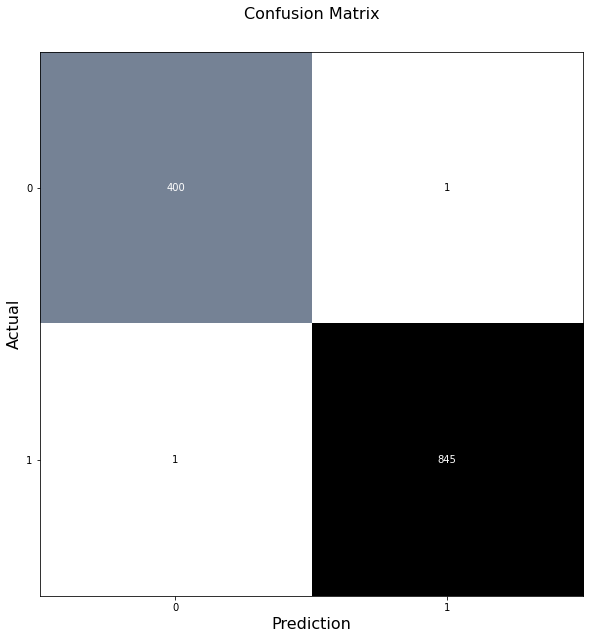

In [69]:
confusion_matrix=metrics.confusion_matrix(y1_test,xgb_pred1_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.bone_r,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##Gradient Boosting

In [70]:
grad_model_1 = GradientBoostingClassifier()
grad_model_1.fit(x1_train,y1_train)

GradientBoostingClassifier()

In [71]:
grad_pred1_train = grad_model_1.predict(x1_train)
grad_pred1_test = grad_model_1.predict(x1_test)

In [72]:
print(f'Training Score: \n{metrics.classification_report(y1_train,grad_pred1_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      2908
   macro avg       1.00      1.00      1.00      2908
weighted avg       1.00      1.00      1.00      2908



In [73]:
print(f'Testing Score: \n{metrics.classification_report(y1_test,grad_pred1_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       846

    accuracy                           1.00      1247
   macro avg       1.00      1.00      1.00      1247
weighted avg       1.00      1.00      1.00      1247



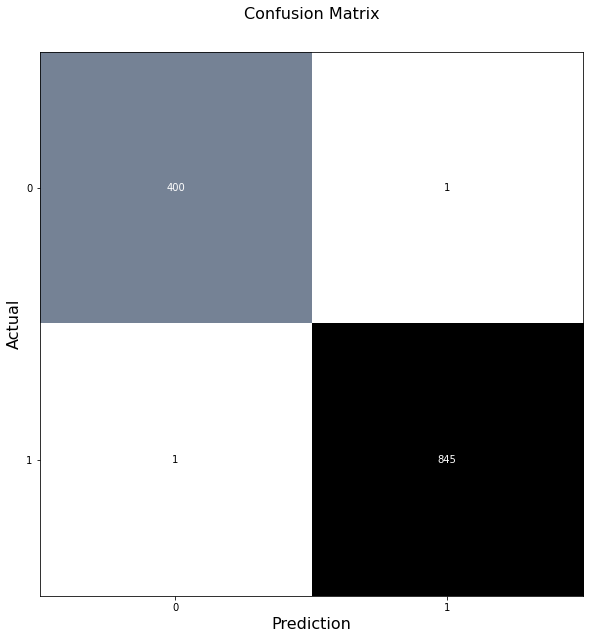

In [74]:
confusion_matrix=metrics.confusion_matrix(y1_test,grad_pred1_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.bone_r,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##SVM

In [75]:
svm_model_1 = svm.SVC()
svm_model_1.fit(x1_train,y1_train)

SVC()

In [76]:
svm_pred1_train = svm_model_1.predict(x1_train)
svm_pred1_test = svm_model_1.predict(x1_test)

In [77]:
print(f'Training Score: \n{metrics.classification_report(y1_train,svm_pred1_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      2908
   macro avg       1.00      1.00      1.00      2908
weighted avg       1.00      1.00      1.00      2908



In [78]:
print(f'Testing Score: \n{metrics.classification_report(y1_test,svm_pred1_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       401
           1       1.00      1.00      1.00       846

    accuracy                           0.99      1247
   macro avg       0.99      0.99      0.99      1247
weighted avg       0.99      0.99      0.99      1247



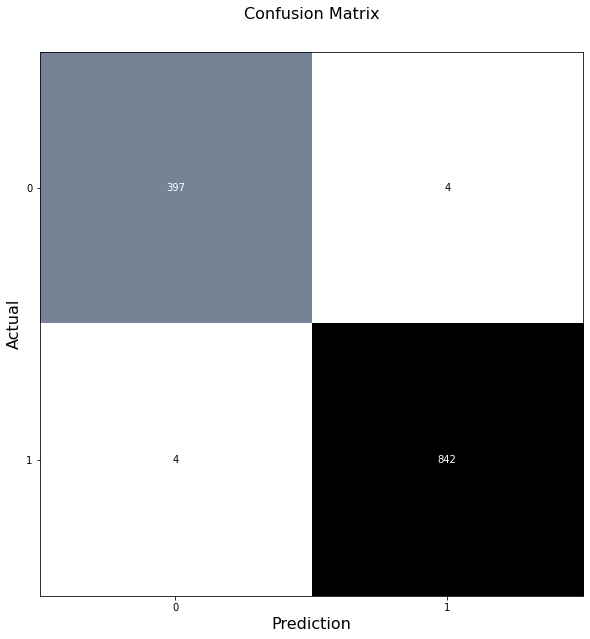

In [79]:
confusion_matrix=metrics.confusion_matrix(y1_test,svm_pred1_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.bone_r,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##Random Forest

In [80]:
forest_1 = RandomForestClassifier()
forest_1.fit(x1_train,y1_train)

RandomForestClassifier()

In [81]:
forest_pred1_train = forest_1.predict(x1_train)
forest_pred1_test = forest_1.predict(x1_test)

In [82]:
print(f'Training Score: \n{metrics.classification_report(y1_train,forest_pred1_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       936
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      2908
   macro avg       1.00      1.00      1.00      2908
weighted avg       1.00      1.00      1.00      2908



In [83]:
print(f'Testing Score: \n{metrics.classification_report(y1_test,forest_pred1_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       401
           1       0.99      1.00      1.00       846

    accuracy                           0.99      1247
   macro avg       0.99      0.99      0.99      1247
weighted avg       0.99      0.99      0.99      1247



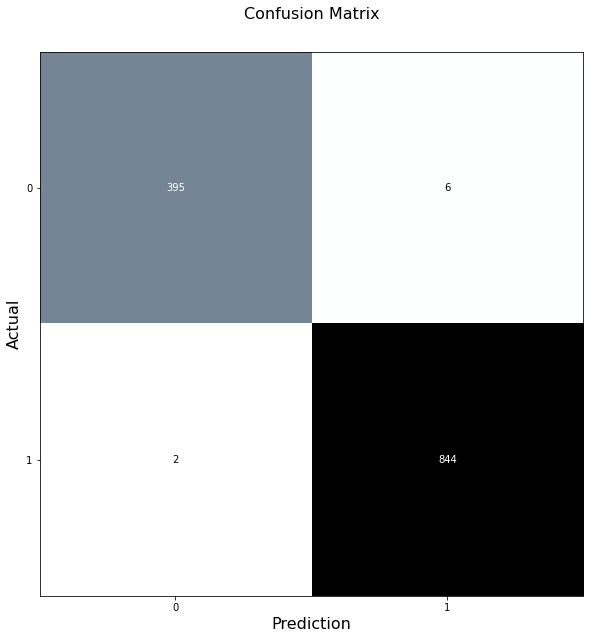

In [84]:
confusion_matrix=metrics.confusion_matrix(y1_test,forest_pred1_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.bone_r,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##Testing new data 

In [85]:
def output_label(n):
  if n == 0:
    return "Fake Acoount"
  elif n ==1:
    return "Not Fake Account"  

In [86]:
def Prediction(statuses_count,followers_count,friends_count,
               favourites_count,listed_count,lang,
               time_zone,geo_enabled,profile_use_background_image,
               profile_text_color,profile_sidebar_border_color,
               profile_background_tile,profile_sidebar_fill_color,
               profile_background_color,profile_link_color,
               utc_offset,description):


  a = {"statuses_count":[statuses_count]} 
  new_a = pd.DataFrame(a)
  new_a_test = new_a["statuses_count"]

  b = {"followers_count":[followers_count]}
  new_b = pd.DataFrame(b)
  new_b_test = new_b["followers_count"]

  c = {"friends_count":[friends_count]}
  new_c = pd.DataFrame(c)
  new_c_test = new_c["friends_count"]

  d = {"favourites_count":[favourites_count]}
  new_d = pd.DataFrame(d)
  new_d_test = new_d["favourites_count"]

  e = {"listed_count":[listed_count]}
  new_e = pd.DataFrame(e)
  new_e_test = new_e["listed_count"]

  f = {"lang":[lang]}
  new_f = pd.DataFrame(f)
  new_f_test = new_f["lang"]

  g = {"time_zone":[time_zone]}
  new_g = pd.DataFrame(g)
  new_g_test = new_g["time_zone"]

  h = {"geo_enabled":[geo_enabled]}
  new_h = pd.DataFrame(h)
  new_h_test = new_h["geo_enabled"]

  i = {"profile_use_background_image":[profile_use_background_image]}
  new_i = pd.DataFrame(i)
  new_i_test = new_i["profile_use_background_image"]

  j = {"profile_text_color":[profile_text_color]}
  new_j = pd.DataFrame(j)
  new_j_test = new_j["profile_text_color"]

  k = {"profile_sidebar_border_color":[profile_sidebar_border_color]}
  new_k = pd.DataFrame(k)
  new_k_test = new_k["profile_sidebar_border_color"]

  l = {"profile_background_tile":[profile_background_tile]}
  new_l = pd.DataFrame(l)
  new_l_test = new_l["profile_background_tile"]

  m = {"profile_sidebar_fill_color":[profile_sidebar_fill_color]}
  new_m = pd.DataFrame(m)
  new_m_test = new_m["profile_sidebar_fill_color"]

  n = {"profile_background_color":[profile_background_color]}
  new_n = pd.DataFrame(n)
  new_n_test = new_n["profile_background_color"]

  o = {"profile_link_color":[profile_link_color]}
  new_o = pd.DataFrame(o)
  new_o_test = new_o["profile_link_color"]

  p = {"utc_offset":[utc_offset]}
  new_p = pd.DataFrame(p)
  new_p_test = new_p["utc_offset"]

  q = {"description":[description]}
  new_q = pd.DataFrame(q)
  new_q["description"] = new_q["description"].apply(prepare_description)
  new_q_test = new_q["description"]

  new_alldf = new_a_test+' '+new_b_test+' '+new_c_test+' '+new_d_test+' '+new_e_test+' '+new_f_test+' '+new_g_test+' '+new_h_test+' '+new_i_test+' '+new_j_test+' '+new_k_test+' '+new_l_test+' '+new_m_test+' '+new_n_test+' '+new_o_test+' '+new_p_test+' '+new_q_test
  new_vector = vector.transform(new_alldf)

  grad_pred1_test = grad_model_1.predict(new_vector)

  return print("\n\nPrediction: {}".format(
      output_label(grad_pred1_test)
  ))

In [87]:
statuses_count = str(input())
followers_count = str(input())
friends_count = str(input())
favourites_count = str(input())
listed_count = str(input())
lang = str(input())
time_zone = str(input())
geo_enabled = str(input())
profile_use_background_image = str(input())
profile_text_color = str(input())
profile_sidebar_border_color = str(input())
profile_background_tile = str(input())
profile_sidebar_fill_color = str(input())
profile_background_color = str(input())
profile_link_color = str(input())
utc_offset = str(input())
description = str(input())


Prediction(statuses_count,followers_count,friends_count,
               favourites_count,listed_count,lang,
               time_zone,geo_enabled,profile_use_background_image,
               profile_text_color,profile_sidebar_border_color,
               profile_background_tile,profile_sidebar_fill_color,
               profile_background_color,profile_link_color,
               utc_offset,description)

20370
5470
2385
145
52
it
Rome
0
1
0C3E53
F2E195
0
FFF7CC
BADFCD
FF0000
3600
Founder of http://www.screenweek.it & http://www.boxofficecup.com - Apple & Movie Lover find me on rebelmouse http://www.rebelmouse.com/davidedellacasa


Prediction: Not Fake Account


##joblib, Saving best model

In [88]:
from joblib import dump

In [89]:
dump(grad_model_1,"grad_model.joblib")
dump(vector,"vector.joblib")

['vector.joblib']